<a href="https://colab.research.google.com/github/shireesha27/demo/blob/master/DLQuestion2_ICP13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 3:**

**Repeat the question 2 on the denoisening autoencoder**

In [15]:
# Importing the neccessary libraries from keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard
from time import time
from keras import regularizers
import matplotlib.pyplot as plt

In [17]:
# this is our input placeholder
encoding_dim = 32
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Adding the hidden layer 32 units with 'relu' activation function
hidden_1 = Dense(32, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden_1)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
encoder.summary()
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
# metrics uses for the performance of the model is accuracy
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


We created the encoder and the decoder.

Input image has been Encoded to 32 units and relu activation function.

Decoder has 784 units and it reconstructs the input image back to its original.
 dimension.

autoencoder used sigmoid activation function. 


In [18]:
# Reading the dataset
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
# normalize values between 0 and 1 
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# Flatten the 28*28 into vectors of size 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print('train samples:',x_train.shape)
print('test samples:',x_test.shape)

train samples: (60000, 784)
test samples: (10000, 784)


We normalized all values between 0 and 1 and we flatten the 28x28 images into vectors of size 784.

In [19]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


In [20]:
# Trained the autoencoder using the training data with 5 epochs and batch size of 256. And, also shuffle the training data.
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6938 - accuracy: 0.0017 - val_loss: 0.6938 - val_accuracy: 0.0010
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6937 - accuracy: 0.0018 - val_loss: 0.6937 - val_accuracy: 0.0010
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6935 - accuracy: 0.0018 - val_loss: 0.6935 - val_accuracy: 0.0011
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6934 - accuracy: 0.0019 - val_loss: 0.6934 - val_accuracy: 0.0011
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6933 - accuracy: 0.0019 - val_loss: 0.6933 - val_accuracy: 0.0012


In [21]:
# Predicting the image from test data
prediction1 = autoencoder.predict(x_test_noisy[[9],:])

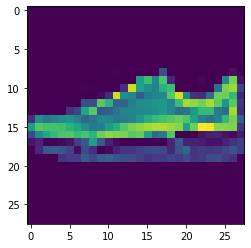

In [22]:
# Input image
from matplotlib import pyplot as plt
plt.imshow(x_test[9].reshape(28,28))
plt.show()

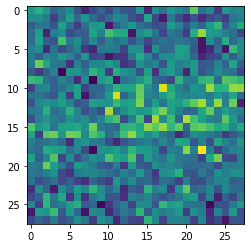

In [23]:
# After applying noise to data we get an image
plt.imshow(x_test_noisy[9].reshape(28,28))
plt.show()

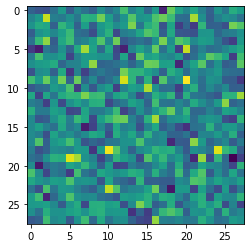

In [24]:
# Reconstructed image
plt.imshow(prediction1[0].reshape(28,28))
plt.show()

**plot loss and accuracy using the history object**

In [25]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


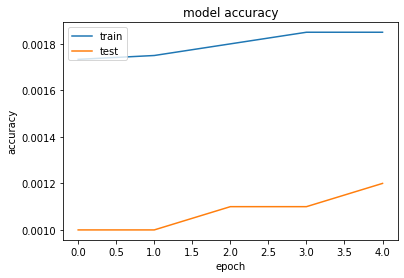

In [26]:
# Summarize history for accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

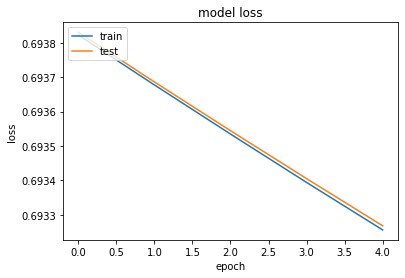

In [27]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Bonus Question:**

**Visualize the compressed version of the input data in the middle layer**

In [28]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)
encoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
print(encoder.summary())
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Normalizing the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# Flatten the 28*28 into vectors of size 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# Pridicting the encoded image
encoded_imgs = encoder.predict(x_test[[9],:])

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None


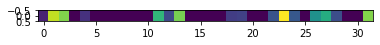

In [29]:
# Display the compressed image or encode image
plt.imshow(encoded_imgs)
plt.show()